# Plotting Capabilities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import tumorsphere as ts
import tumorsphere.library.plot_populations as tplt
import tumorsphere.library.dataframe_generation as tdfg
import tumorsphere.library.p_infty_processing as tpinf

## Loading the `DataFrames`

In [2]:
# Load the DataFrames from the CSV files
df_from_dbs = pd.read_csv("./merged_df_and_db/df_from_dbs.csv")
df_from_dats = pd.read_csv("./merged_df_and_db/df_from_dats.csv")

# Drop the 'culture_id' column from df_from_dbs if it exists
df_from_dbs_to_compare = df_from_dbs.drop(
    columns=["culture_id"], errors="ignore"
)

# Sort the DataFrames by all columns to ensure order does not affect comparison
df_from_dbs_sorted = df_from_dbs_to_compare.sort_values(
    by=df_from_dbs_to_compare.columns.tolist()
).reset_index(drop=True)
df_from_dats_sorted = df_from_dats.sort_values(
    by=df_from_dats.columns.tolist()
).reset_index(drop=True)

# Compare the sorted DataFrames to check if they are the same
comparison = df_from_dbs_sorted.equals(df_from_dats_sorted)

# Print the result of the comparison
print(f"The DataFrames are {'identical' if comparison else 'different'}.")

# Optional: Show the differences if they are not identical
if not comparison:
    # Find rows that are different using a more detailed comparison
    comparison_results = df_from_dbs_sorted.compare(df_from_dats_sorted)
    print("Detailed differences between DataFrames:")
    print(comparison_results)

# In case they're different, use this to explore
# diff_df.loc[(diff_df['pd']==0.0)&(diff_df['ps']==0.7)&(diff_df['rng_seed']==722217751506193)&(diff_df['time']==8)]

The DataFrames are identical.


We can see the different realizations by asking for rows with the same time.

In [3]:
df_from_dbs.loc[df_from_dbs["time"] == 0]

,culture_id,pd,ps,rng_seed,time,total_cells,active_cells,stem_cells,active_stem_cells
0,1,0.0,0.7,722217751506193,0,1,1,1,1
13,2,0.1,0.7,781299191188075,0,1,1,1,1
26,3,0.1,0.6,722217751506193,0,1,1,1,1
39,4,0.0,0.7,781299191188075,0,1,1,1,1
52,5,0.0,0.6,722217751506193,0,1,1,1,1
65,6,0.1,0.6,781299191188075,0,1,1,1,1
78,7,0.1,0.7,722217751506193,0,1,1,1,1
91,8,0.0,0.6,781299191188075,0,1,1,1,1


Note that the only difference between the `DataFrame` obtained from the `.db` files and the one obtained from `.dat` files, is the presence of absence of the `culture_id` column.

In [4]:
df_from_dats.loc[df_from_dats["time"] == 0]

,pd,ps,rng_seed,time,total_cells,active_cells,stem_cells,active_stem_cells
0,0.1,0.7,722217751506193,0,1,1,1,1
13,0.0,0.6,722217751506193,0,1,1,1,1
26,0.0,0.7,722217751506193,0,1,1,1,1
39,0.1,0.7,781299191188075,0,1,1,1,1
52,0.0,0.6,781299191188075,0,1,1,1,1
65,0.0,0.7,781299191188075,0,1,1,1,1
78,0.1,0.6,781299191188075,0,1,1,1,1
91,0.1,0.6,722217751506193,0,1,1,1,1


A particular realization is specified by its $p_s$, $p_d$, and the `rng_seed`. In the case of `DataFrames` obtained from `.db` files, we can use the shortcut of specifying the `culture_id`.

In [5]:
df_from_dbs.loc[df_from_dbs["culture_id"] == 1]

,culture_id,pd,ps,rng_seed,time,total_cells,active_cells,stem_cells,active_stem_cells
0,1,0.0,0.7,722217751506193,0,1,1,1,1
1,1,0.0,0.7,722217751506193,1,2,2,2,2
2,1,0.0,0.7,722217751506193,2,4,4,4,4
3,1,0.0,0.7,722217751506193,3,8,8,6,6
4,1,0.0,0.7,722217751506193,4,16,16,9,9
5,1,0.0,0.7,722217751506193,5,32,32,17,17
6,1,0.0,0.7,722217751506193,6,63,62,31,31
7,1,0.0,0.7,722217751506193,7,115,104,50,45
8,1,0.0,0.7,722217751506193,8,193,156,72,55
9,1,0.0,0.7,722217751506193,9,313,240,97,68


## Plotting evolution examples
If one wishes to see an example of the time evolution of populations, it's enough to make use of the `plot_single_realization` function. Just specify the culture, the populations to plot, and the scale (either logarithmic or liear).

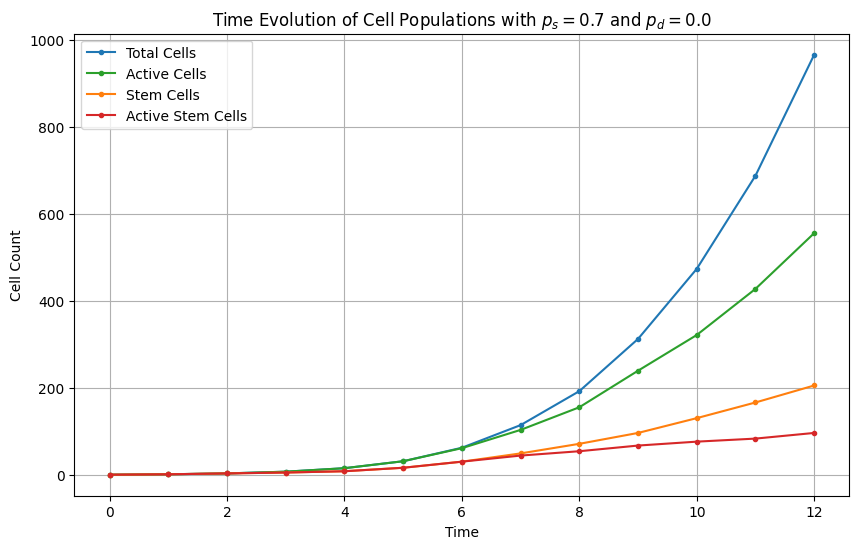

In [6]:
tplt.plot_single_realization(df_from_dbs, culture_id=1)

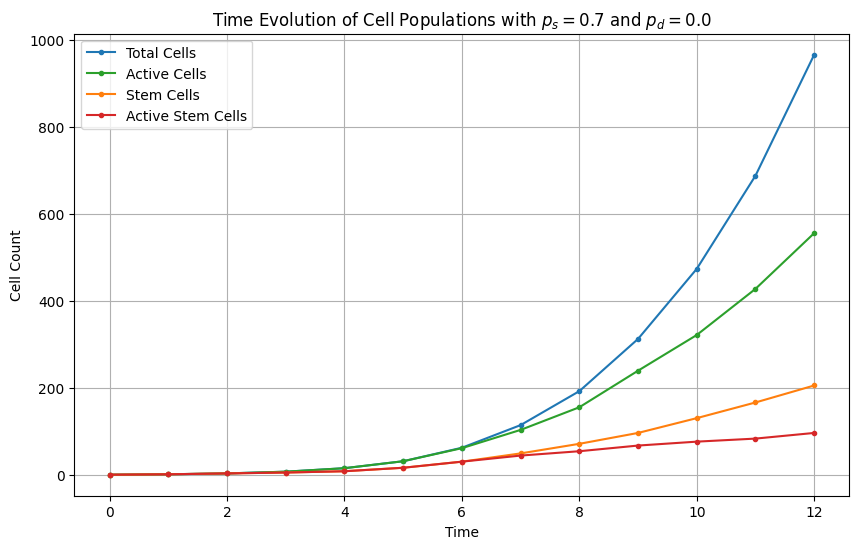

In [7]:
tplt.plot_single_realization(
    df_from_dats, pd=0.0, ps=0.7, rng_seed=722217751506193
)

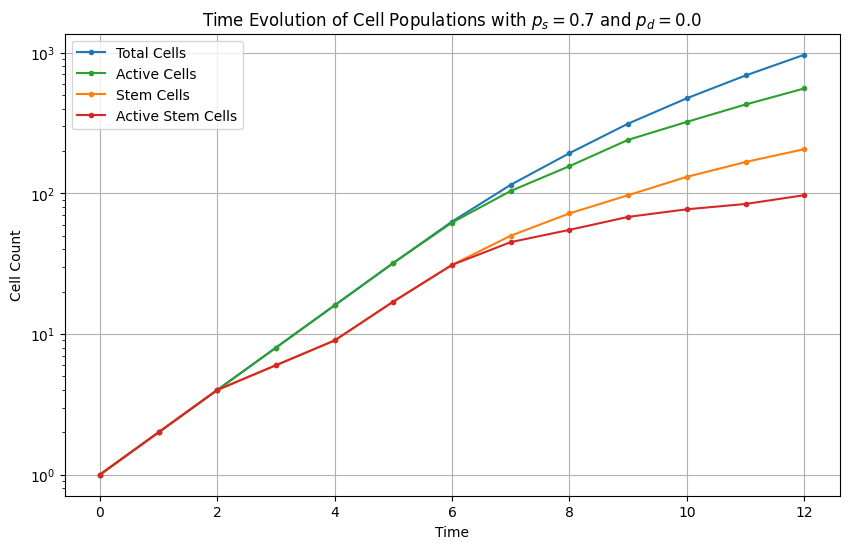

In [8]:
tplt.plot_single_realization(df_from_dbs, culture_id=1, log=True)

## Plotting Averages
To plot the average evolution (over realizations, i.e., over different `rng_seed`'s) for given $p_d$ and $p_s$ values, we use the `plot_avg_evolution` function. Internally, it usees the `average_over_realizations` function, which returns a `DataFrame` with the averages (mean and standard deviation).

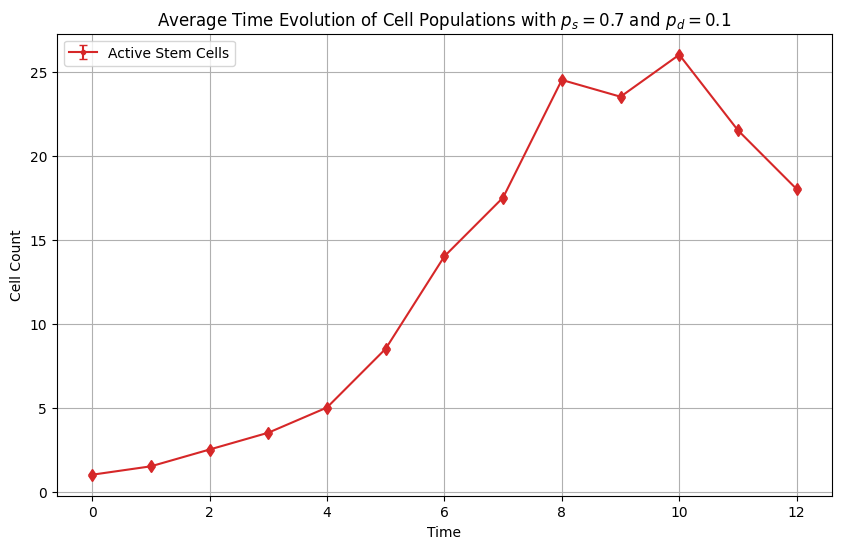

In [9]:
tplt.plot_avg_evolution(df_from_dbs, ps=0.7, pd=0.1)

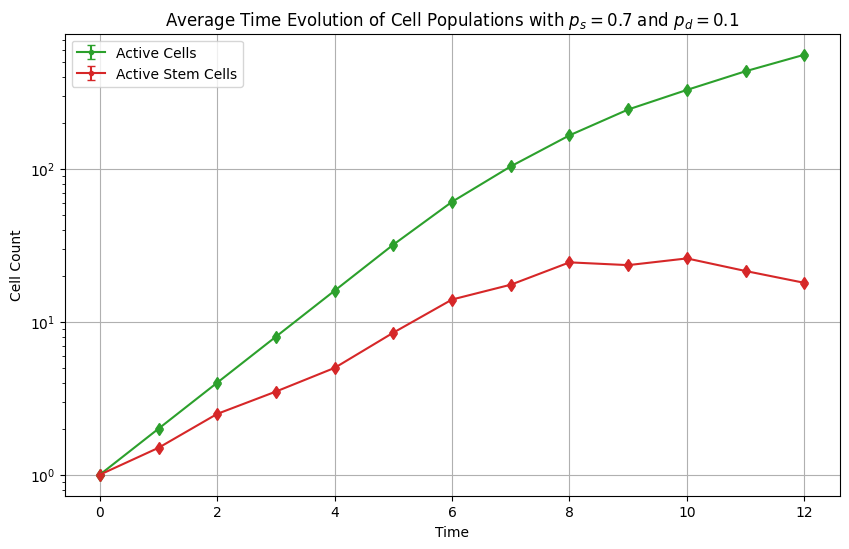

In [10]:
tplt.plot_avg_evolution(
    df_from_dbs, ps=0.7, pd=0.1, plot_active_cells=True, log=True
)

We can use this function to plot some population for a given $p_d$ value, and a list of $p_s$ values. Plotting more than one of this populations at the same time is possible, but unadvised.

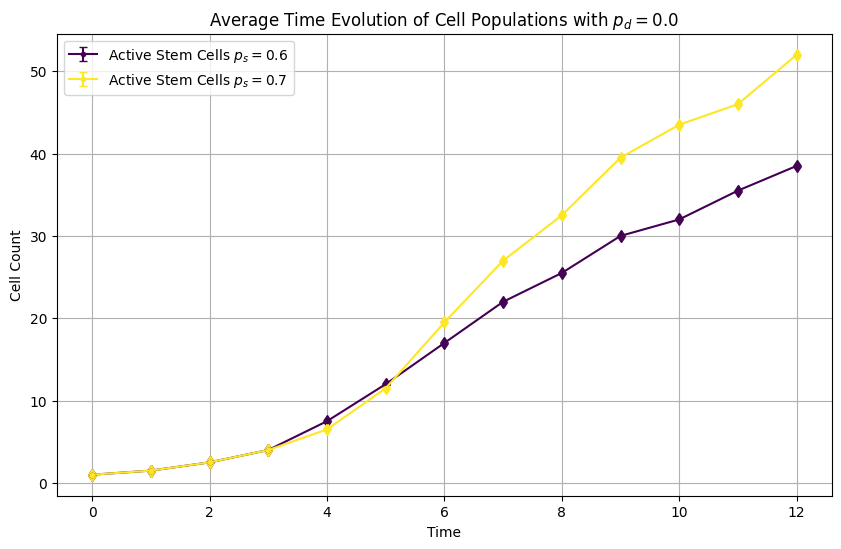

In [11]:
tplt.plot_avg_evolution(df_from_dbs, ps=[0.6, 0.7], pd=0.0)

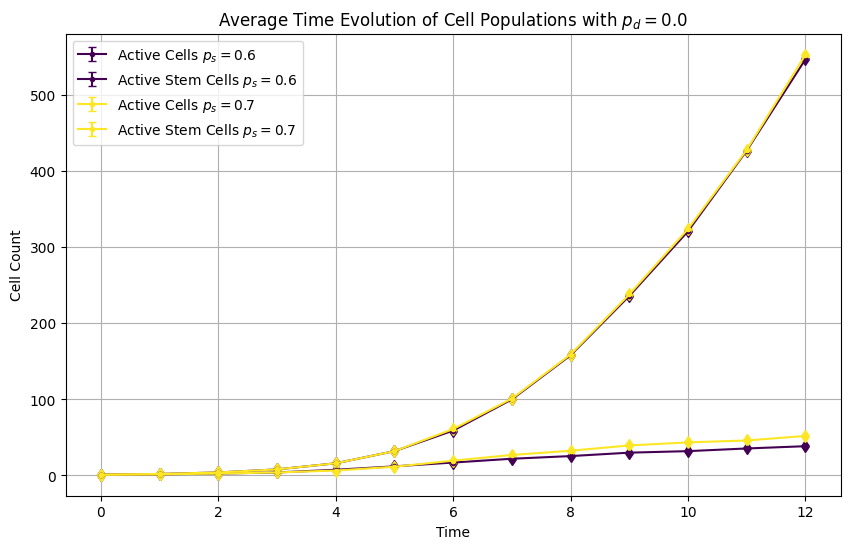

In [12]:
tplt.plot_avg_evolution(
    df_from_dbs, ps=[0.6, 0.7], pd=0.0, plot_active_cells=True
)

## $P_\infty$ vs $t$

In [13]:
avg_df = tdfg.average_over_realizations(
    df_from_dbs, avg_stem_indicator=True, calculate_stem_indicator=True
)
avg_df.head()

,pd,ps,time,total_cells,active_cells,stem_cells,active_stem_cells,active_stem_cells_indicator,total_cells_std,active_cells_std,stem_cells_std,active_stem_cells_std,active_stem_cells_indicator_std
0,0.0,0.6,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.6,1,2.0,2.0,1.5,1.5,1.0,0.0,0.0,0.707107,0.707107,0.0
2,0.0,0.6,2,4.0,4.0,2.5,2.5,1.0,0.0,0.0,2.121320,2.121320,0.0
3,0.0,0.6,3,8.0,8.0,4.0,4.0,1.0,0.0,0.0,2.828427,2.828427,0.0
4,0.0,0.6,4,16.0,16.0,7.5,7.5,1.0,0.0,0.0,4.949747,4.949747,0.0


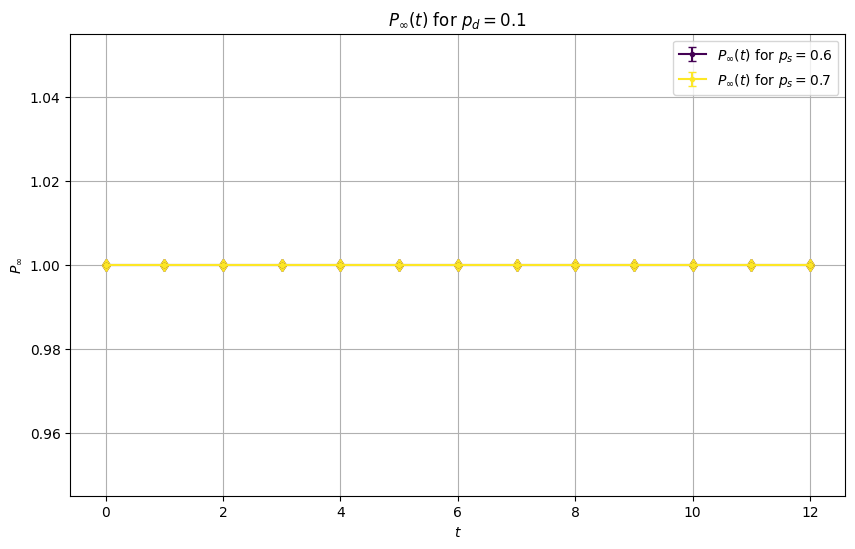

In [14]:
tpinf.plot_p_infty_vs_time(avg_df, ps=[0.6, 0.7], pd=0.1)

## $P_\infty$ vs $p_s$

In [15]:
avg_df.loc[(avg_df["time"] == 2) & (avg_df["pd"] == 0.1)]

,pd,ps,time,total_cells,active_cells,stem_cells,active_stem_cells,active_stem_cells_indicator,total_cells_std,active_cells_std,stem_cells_std,active_stem_cells_std,active_stem_cells_indicator_std
28,0.1,0.6,2,4.0,4.0,2.5,2.5,1.0,0.0,0.0,2.12132,2.12132,0.0
41,0.1,0.7,2,4.0,4.0,2.5,2.5,1.0,0.0,0.0,2.12132,2.12132,0.0


In [16]:
avg_df.loc[(avg_df["ps"] == 0.7) & (avg_df["pd"] == 0.0)]

,pd,ps,time,total_cells,active_cells,stem_cells,active_stem_cells,active_stem_cells_indicator,total_cells_std,active_cells_std,stem_cells_std,active_stem_cells_std,active_stem_cells_indicator_std
13,0.0,0.7,0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0
14,0.0,0.7,1,2.0,2.0,1.5,1.5,1.0,0.000000,0.000000,0.707107,0.707107,0.0
15,0.0,0.7,2,4.0,4.0,2.5,2.5,1.0,0.000000,0.000000,2.121320,2.121320,0.0
16,0.0,0.7,3,8.0,8.0,4.0,4.0,1.0,0.000000,0.000000,2.828427,2.828427,0.0
17,0.0,0.7,4,16.0,16.0,6.5,6.5,1.0,0.000000,0.000000,3.535534,3.535534,0.0
18,0.0,0.7,5,32.0,32.0,11.5,11.5,1.0,0.000000,0.000000,7.778175,7.778175,0.0
19,0.0,0.7,6,62.5,61.0,20.0,19.5,1.0,0.707107,1.414214,15.556349,16.263456,0.0
20,0.0,0.7,7,113.0,101.0,31.0,27.0,1.0,2.828427,4.242641,26.870058,25.455844,0.0
21,0.0,0.7,8,192.5,159.0,44.0,32.5,1.0,0.707107,4.242641,39.597980,31.819805,0.0
22,0.0,0.7,9,311.5,238.0,58.5,39.5,1.0,2.121320,2.828427,54.447222,40.305087,0.0


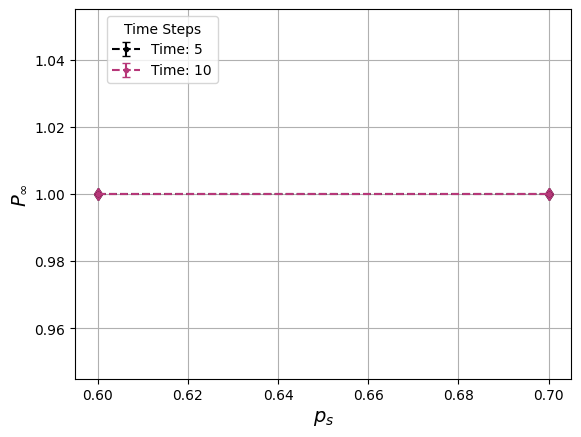

In [17]:
# list_of_time_steps = [i for i in range(13)]
tpinf.plot_p_infty_vs_ps(avg_df, time_steps=[5, 10])

/home/jfotinos/.virtualenvs/tumorsphere_culture/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


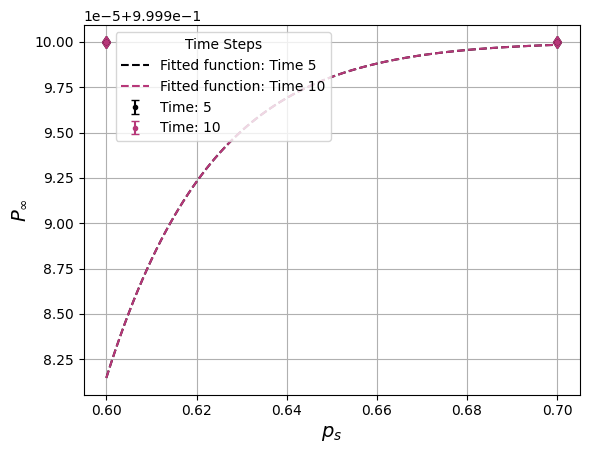

In [18]:
tpinf.plot_p_infty_vs_ps(avg_df, time_steps=[5, 10], fit=True)
# I think the warning that's raising is due to either the
# small quantity of points and the poor fitting of the data

We can also save the picture instead of showing it.

In [19]:
# tpinf.plot_p_infty_vs_ps(avg_df, time_steps=[5, 10], save=True) # , path_to_save="../"

----------- Time 5 -----------
Fitting parameters:
  p_c (critical percolation probability): 0.18211302177075592
  c (constant): 0.14326716053845867
Covariance of parameters (covariance matrix):
  [[inf inf]
 [inf inf]]

----------- Time 10 -----------
Fitting parameters:
  p_c (critical percolation probability): 0.18211302177075592
  c (constant): 0.14326716053845867
Covariance of parameters (covariance matrix):
  [[inf inf]
 [inf inf]]



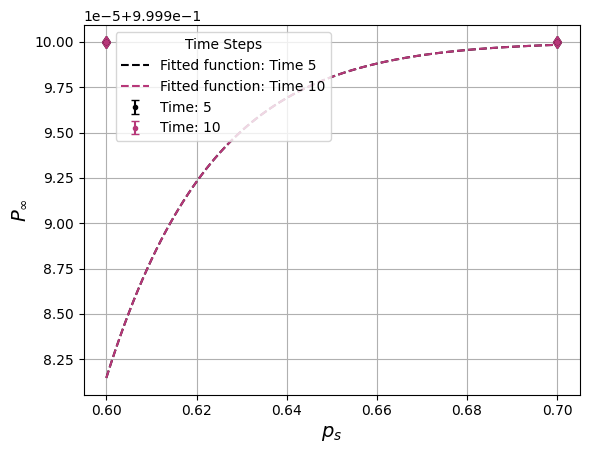

In [20]:
tpinf.plot_p_infty_vs_ps(
    avg_df, time_steps=[5, 10], fit=True, print_statistics=True
)

## $p_c(t)$

In [21]:
avg_df.head()

,pd,ps,time,total_cells,active_cells,stem_cells,active_stem_cells,active_stem_cells_indicator,total_cells_std,active_cells_std,stem_cells_std,active_stem_cells_std,active_stem_cells_indicator_std
0,0.0,0.6,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.6,1,2.0,2.0,1.5,1.5,1.0,0.0,0.0,0.707107,0.707107,0.0
2,0.0,0.6,2,4.0,4.0,2.5,2.5,1.0,0.0,0.0,2.121320,2.121320,0.0
3,0.0,0.6,3,8.0,8.0,4.0,4.0,1.0,0.0,0.0,2.828427,2.828427,0.0
4,0.0,0.6,4,16.0,16.0,7.5,7.5,1.0,0.0,0.0,4.949747,4.949747,0.0


In [22]:
fitted_df = tpinf.make_df_fitted_pc_vs_t(avg_df, fit_with_uncert=False)
fitted_df

/home/jfotinos/.virtualenvs/tumorsphere_culture/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


,t,pc,pc_err,c,c_err
0,0,0.182113,inf,0.143267,inf
1,1,0.182113,inf,0.143267,inf
2,2,0.182113,inf,0.143267,inf
3,3,0.182113,inf,0.143267,inf
4,4,0.182113,inf,0.143267,inf
5,5,0.182113,inf,0.143267,inf
6,6,0.182113,inf,0.143267,inf
7,7,0.182113,inf,0.143267,inf
8,8,0.182113,inf,0.143267,inf
9,9,0.182113,inf,0.143267,inf


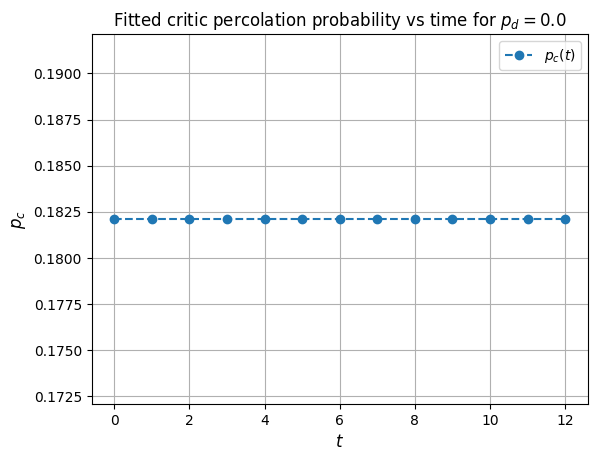

In [23]:
tpinf.plot_fitted_pc_vs_t(fitted_df)

### Plot with error bars

In [24]:
avg_df_mod = avg_df.copy()
avg_df_mod["active_stem_cells_indicator_std"] = 0.1
avg_df_mod.head()

,pd,ps,time,total_cells,active_cells,stem_cells,active_stem_cells,active_stem_cells_indicator,total_cells_std,active_cells_std,stem_cells_std,active_stem_cells_std,active_stem_cells_indicator_std
0,0.0,0.6,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.1
1,0.0,0.6,1,2.0,2.0,1.5,1.5,1.0,0.0,0.0,0.707107,0.707107,0.1
2,0.0,0.6,2,4.0,4.0,2.5,2.5,1.0,0.0,0.0,2.121320,2.121320,0.1
3,0.0,0.6,3,8.0,8.0,4.0,4.0,1.0,0.0,0.0,2.828427,2.828427,0.1
4,0.0,0.6,4,16.0,16.0,7.5,7.5,1.0,0.0,0.0,4.949747,4.949747,0.1


In [25]:
fitted_df_mod = tpinf.make_df_fitted_pc_vs_t(avg_df_mod, fit_with_uncert=True)
fitted_df_mod

/home/jfotinos/.virtualenvs/tumorsphere_culture/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


,t,pc,pc_err,c,c_err
0,0,0.163888,inf,0.128931,inf
1,1,0.163888,inf,0.128931,inf
2,2,0.163888,inf,0.128931,inf
3,3,0.163888,inf,0.128931,inf
4,4,0.163888,inf,0.128931,inf
5,5,0.163888,inf,0.128931,inf
6,6,0.163888,inf,0.128931,inf
7,7,0.163888,inf,0.128931,inf
8,8,0.163888,inf,0.128931,inf
9,9,0.163888,inf,0.128931,inf


In [26]:
fitted_df_mod["pc_err"] = 0.01
fitted_df_mod.head()

,t,pc,pc_err,c,c_err
0,0,0.163888,0.01,0.128931,inf
1,1,0.163888,0.01,0.128931,inf
2,2,0.163888,0.01,0.128931,inf
3,3,0.163888,0.01,0.128931,inf
4,4,0.163888,0.01,0.128931,inf


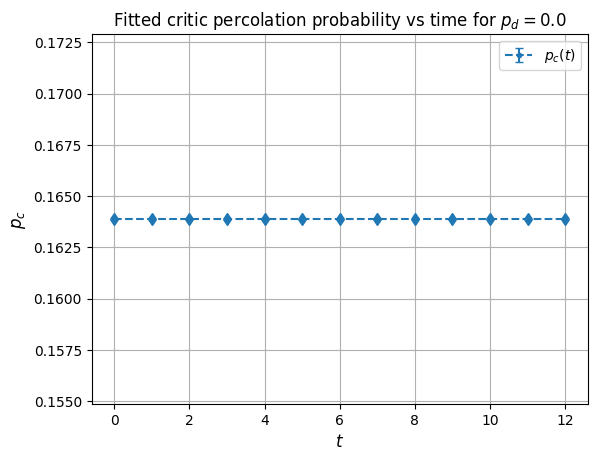

In [27]:
tpinf.plot_fitted_pc_vs_t(fitted_df_mod, plot_err_bars=True)

## Heatmaps
### $P_\infty$ values in the $p_s$ vs $t$ plane (fixed $p_d$)

In [28]:
# Just creating a more interesting DataFrame to test the function
avg_df_mod2 = avg_df.loc[avg_df["pd"] == 0.0].copy()
avg_df_mod2["active_stem_cells_indicator"] = (
    avg_df_mod2["active_stem_cells_indicator"]
    + 0.1 * avg_df_mod2["time"]
    + 0.6 * avg_df_mod2["ps"]
)
avg_df_mod2.head()

,pd,ps,time,total_cells,active_cells,stem_cells,active_stem_cells,active_stem_cells_indicator,total_cells_std,active_cells_std,stem_cells_std,active_stem_cells_std,active_stem_cells_indicator_std
0,0.0,0.6,0,1.0,1.0,1.0,1.0,1.36,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.6,1,2.0,2.0,1.5,1.5,1.46,0.0,0.0,0.707107,0.707107,0.0
2,0.0,0.6,2,4.0,4.0,2.5,2.5,1.56,0.0,0.0,2.121320,2.121320,0.0
3,0.0,0.6,3,8.0,8.0,4.0,4.0,1.66,0.0,0.0,2.828427,2.828427,0.0
4,0.0,0.6,4,16.0,16.0,7.5,7.5,1.76,0.0,0.0,4.949747,4.949747,0.0


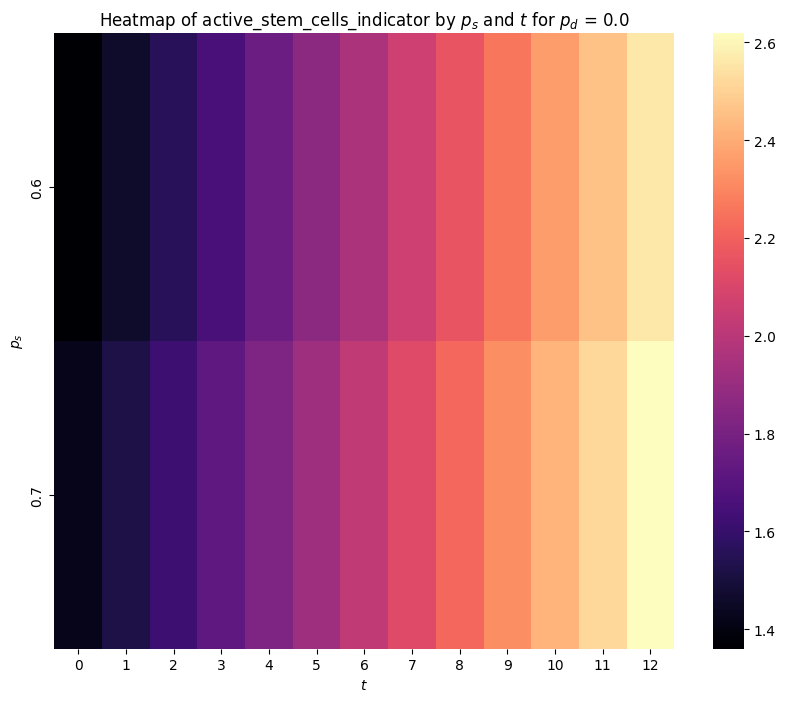

In [29]:
tpinf.plot_pinfty_heatmap_in_ps_vs_t(avg_df_mod2)

### $p_c$ values in the $p_s$ vs $p_d$ plane (fixed $t$)
To be done. I won't do it just yet since now we can simply use the function `make_df_fitted_pc_vs_t` for different $p_d$ values, and then concatenate the `DataFrames` to get a general one. Then we could simply filter this last one by time and plot whatever we want. I won't implement that either for now, since I doubt how useful will that be. Also, as I say in the docstring “an alternative in the future could be to use the maximum value of a sigmoide function fitted to pc(t)”, so there's arguably more than one way to get what we want.